In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/Project/

Cartoon		Cartoon_Model	     Filtered_Dataset  sketch_folder	    Transformed_Sketch
Cartoon_Class	Dataset		     Sketch	       Sketch_Model
cartoon_folder	Dataset_Classfolder  Sketch_Class      Transformed_Cartoon


**Making a dataset for the use of our project**

In [ ]:
from PIL import Image
import os, os.path
import shutil

dataset = '/content/drive/MyDrive/Project/Dataset/realFaces/'
filtered_dataset = '/content/drive/MyDrive/Project/Filtered_Dataset'

for f in os.listdir(dataset):
    name,ext = os.path.splitext(f)
    old_name = os.path.join(dataset,f)
    new_name = os.path.join(filtered_dataset,f)
    shutil.copy(old_name,new_name)

**Resize Image to 224*224**

In [ ]:
from PIL import Image
import os, os.path

filtered_dataset = '/content/drive/MyDrive/Project/Filtered_Dataset/'
file =[f for f in os.listdir(filtered_dataset)]

for imgs in file:
  source_path = os.path.join(filtered_dataset,imgs)
  img = Image.open(source_path)
  width, height = img.size
  print(width,height)
  target_size = (224,224)
  img = img.resize(target_size, Image.ANTIALIAS)
  img.save(source_path)

<ipython-input-4-9d98b3aa23ec>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


**Image Shape is 224*224 *3**

In [ ]:
filtered_dataset = '/content/drive/MyDrive/Project/Filtered_Dataset/'
file =[f for f in os.listdir(filtered_dataset)]

for imgs in file:
  source_path = os.path.join(filtered_dataset,imgs)
  img = Image.open(source_path)
  width, height = img.size
  img_shape = img.size + (len(img.getbands()),)
  print(width,height)
  print(img_shape)

**Real Image to Cartoon Image**

In [ ]:
from PIL import Image, ImageFilter
import cv2

filtered_dataset = '/content/drive/MyDrive/Project/Filtered_Dataset/'
cartoon_path = '/content/drive/MyDrive/Project/Cartoon/'

file =[f for f in os.listdir(filtered_dataset)]

for imgs in file:
  source_path = os.path.join(filtered_dataset,imgs)
  image = cv2.imread(source_path)
  smooth = cv2.bilateralFilter(image,d=9,sigmaColor=75,sigmaSpace=75)
  gray = cv2.cvtColor(smooth,cv2.COLOR_BGR2GRAY)
  blurred = cv2.medianBlur(gray,7)
  edgemask = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)
  edgeimage = cv2.cvtColor(edgemask,cv2.COLOR_GRAY2BGR)
  cartoon = cv2.bitwise_and(smooth,edgeimage)
  output_path = os.path.join(cartoon_path,imgs)
  cv2.imwrite(output_path,cartoon)

**Real Image to Sketch Image**

In [ ]:
from PIL import Image, ImageFilter
import cv2

filtered_dataset = '/content/drive/MyDrive/Project/Filtered_Dataset/'
sketch_path = '/content/drive/MyDrive/Project/Sketch/'

file =[f for f in os.listdir(filtered_dataset)]

for imgs in file:
  source_path = os.path.join(filtered_dataset,imgs)
  image = cv2.imread(source_path)
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  gray_inverse = 255 - gray
  blur = cv2.GaussianBlur(gray_inverse,(21,21),0)
  blur_inverse = 255 - blur
  sketch = cv2.divide(gray, blur_inverse, scale = 256.0)
  output_path = os.path.join(sketch_path,imgs)
  cv2.imwrite(output_path,sketch)

**Calculate no of Class**

In [ ]:
dataset = '/content/drive/MyDrive/Project/Dataset/realFaces/'
classes = []
for f in os.listdir(dataset):
  name,ext = os.path.splitext(f)
  if name[:-4] not in classes:
    classes.append(name[:-4])
classes.sort()
print(classes)
print(len(classes))

**Classfolder for real Images**

In [ ]:
dataset_classfolder = '/content/drive/MyDrive/Project/Dataset_Classfolder/'
filtered_dataset = '/content/drive/MyDrive/Project/Filtered_Dataset/'

for name in classes:
  class_folder = os.path.join(dataset_classfolder,name)
  os.makedirs(class_folder, exist_ok=True)

file =[f for f in os.listdir(filtered_dataset)]
folder = [f1 for f1 in os.listdir(dataset_classfolder)]

for files in file:
  for folders in folder:
    if folders == files[:-8]:
      src_path = os.path.join(filtered_dataset, files)
      dst_folder = os.path.join(dataset_classfolder,folders)
      shutil.copy(src_path,dst_folder)

**Classfolder for cartoon images**

In [ ]:
cartoon_classfolder = '/content/drive/MyDrive/Project/Cartoon_Class/'
cartoon_folder = '/content/drive/MyDrive/Project/cartoon_folder/'
for name in classes:
  class_folder = os.path.join(cartoon_folder,name)
  os.makedirs(class_folder, exist_ok=True)

**Cartoon Images moved to their respective Cartoon classes Folder**

In [ ]:
cartoon_classfolder = '/content/drive/MyDrive/Project/Cartoon_Class/'
cartoon_path = '/content/drive/MyDrive/Project/Cartoon/'
cartoon_folder = '/content/drive/MyDrive/Project/cartoon_folder/'

file =[f for f in os.listdir(cartoon_path)]
folder = [f1 for f1 in os.listdir(cartoon_folder)]

for files in file:
  for folders in folder:
    if folders == files[:-8]:
      src_path = os.path.join(cartoon_path, files)
      dst_folder = os.path.join(cartoon_folder,folders)
      shutil.copy(src_path,dst_folder)

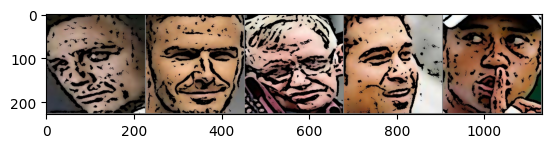

Cartoon Dataset
DanielCraig DavidBeckham StephenHawking SachinTendulkar TigerWoods


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.8, 0.8, 0.8), (0.8, 0.8, 0.8))])
bs =5

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataset = ImageFolder(root = cartoon_folder, transform = data_transform)
dataloader = DataLoader(dataset, batch_size = bs, shuffle=True)

dataiter = iter(dataloader)

images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print("Cartoon Dataset")
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(bs)))

**Sketch Folder**

In [ ]:
sketch_classfolder = '/content/drive/MyDrive/Project/Sketch_Class/'
sketch_folder = "/content/drive/MyDrive/Project/sketch_folder/"

for name in classes:
  class_folder = os.path.join(sketch_folder,name)
  #os.makedirs(class_folder, exist_ok=True)

**Sketch Images moves to their respective sketch classes Folder**

In [ ]:
sketch_classfolder = '/content/drive/MyDrive/Project/Sketch_Class/'
sketch_path = '/content/drive/MyDrive/Project/Sketch/'

file =[f for f in os.listdir(sketch_path)]
folder = [f1 for f1 in os.listdir(sketch_folder)]

for files in file:
  for folders in folder:
    if folders == files[:-8]:
      src_path = os.path.join(sketch_path, files)
      dst_folder = os.path.join(sketch_folder,folders)
      shutil.copy(src_path,dst_folder)

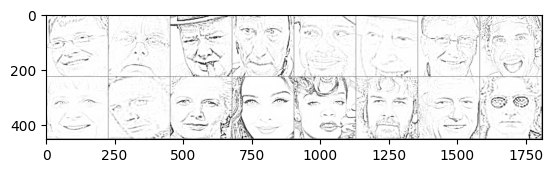

Sketch Dataset
BillGates LaluPrasadYadav WinstonChurchill LanceArmstrong TigerWoods


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

data_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.8, 0.8, 0.8), (0.8, 0.8, 0.8))])
bs = 5
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataset1 = ImageFolder(root = sketch_folder, transform = data_transform)
dataloader1 = DataLoader(dataset1, batch_size = bs, shuffle=True)

dataiter = iter(dataloader1)

images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print("Sketch Dataset")
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(5)))

**Transform the Images to increase the size of the dataset using augmentation**

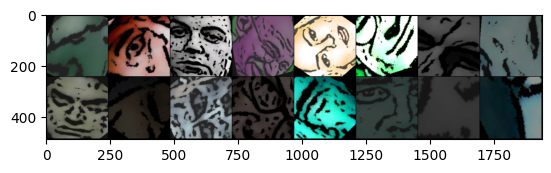

QueenElizabethII PeterSellers PaulMcCartney MahatmaGandhi Shakira DanielRadicliffe CheGuevara MarilynMonroe AamirKhan MotherTeresa DwayneJohnson BillGates ArnoldSchwazegger JimCarrey MalcolmX KatrinaKaif


In [ ]:
import torch
from torchvision import transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.RandomRotation(50),transforms.RandomResizedCrop(240),transforms.RandomHorizontalFlip(),
                                transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue =0.5),transforms.ToTensor(),])

dataset = ImageFolder(root = cartoon_classfolder, transform = transform)
bs = 16
dataloader = DataLoader(dataset, batch_size = bs, shuffle=True)

def imshow(img):
    imggrid = make_grid(img, nrow=bs)
    npimg = imggrid.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(dataloader)
images, labels = next(dataiter)

imshow(make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(bs)))

**Create Transformed Cartoon Class**

In [ ]:
transformed_cartoon_classfolder = '/content/drive/MyDrive/Project/Transformed_Cartoon_Class/'
for name in classes:
  class_folder = os.path.join(transformed_cartoon_classfolder,name)
  os.makedirs(class_folder, exist_ok=True)

**Create Transformed Images**

In [ ]:
cartoon_path = '/content/drive/MyDrive/Project/Cartoon/'
transformed_cartoon_path = '/content/drive/MyDrive/Project/Transformed_Cartoon/'

import torch
from torchvision import transforms
from torchvision.utils import make_grid

transform = transforms.Compose([transforms.RandomRotation(90),transforms.RandomResizedCrop(224),transforms.RandomHorizontalFlip(),
                                transforms.ColorJitter(brightness=0.8, contrast=0.6, saturation=0.7, hue =0.3),transforms.ToTensor(),])

file =[f for f in os.listdir(cartoon_path)]


celebrities = []

for imgs in file:
  for i in range(0,0):
    name, ext = os.path.splitext(imgs)
    if int(name[-1])<=11 and name not in celebrities:
      img_name = f"{name}{ext}"
      celebrities.append(name)
    elif int(name[-1])<=11:
      img_name = f"{name[:-1]}{int(name[-2])+i}{ext}"
    else:
      img_name = f"{name[:-2]}{int(name[-2])+i}{ext}"
    source_path = os.path.join(cartoon_path,imgs)
    image = Image.open(source_path)
    transformed_img = transform(image)
    transformed_numpy = (np.array(transformed_img.permute(1,2,0))*255).astype(np.uint8)
    transformed_image = cv2.cvtColor(transformed_numpy, cv2.COLOR_RGB2BGR)
    output_path = os.path.join(transformed_cartoon_path,img_name)
    cv2.imwrite(output_path,transformed_image)

**Shift Transformed Images to their respective Cartoon Class Folders**

In [ ]:
transformed_cartoon_path = '/content/drive/MyDrive/Project/Transformed_Cartoon/'
cartoon_classfolder = '/content/drive/MyDrive/Project/Cartoon_Class/'

file =[f for f in os.listdir(transformed_cartoon_path)]
folder = [f1 for f1 in os.listdir(cartoon_classfolder)]

for files in file:
  for folders in folder:
    if folders == files[:-9]:
      src_path = os.path.join(transformed_cartoon_path, files)
      dst_folder = os.path.join(cartoon_classfolder,folders)
      shutil.copy(src_path,dst_folder)

**Similarly for sketches**

In [ ]:
sketch_path = '/content/drive/MyDrive/Project/Sketch/'
transformed_sketch_path = '/content/drive/MyDrive/Project/Transformed_Sketch/'

import torch
from torchvision import transforms
from torchvision.utils import make_grid

transform = transforms.Compose([transforms.RandomRotation(90),transforms.RandomResizedCrop(224),transforms.RandomHorizontalFlip(),
                                transforms.ColorJitter(brightness=0.8, contrast=0.6, saturation=0.7, hue =0.3),transforms.ToTensor(),])

file =[f for f in os.listdir(sketch_path)]


celebrities = []


for imgs in file:
  for i in range(0,0):
    name, ext = os.path.splitext(imgs)
    if int(name[-1])<=11 and name not in celebrities:
      img_name = f"{name}{ext}"
      celebrities.append(name)
    elif int(name[-1])<=11:
      img_name = f"{name[:-1]}{int(name[-2])+i}{ext}"
    else:
      img_name = f"{name[:-2]}{int(name[-2])+i}{ext}"
    source_path = os.path.join(sketch_path,imgs)
    image = Image.open(source_path)
    transformed_img = transform(image)
    transformed_numpy = (np.array(transformed_img.permute(1,2,0))*255).astype(np.uint8)
    transformed_image = cv2.cvtColor(transformed_numpy, cv2.COLOR_RGB2BGR)
    output_path = os.path.join(transformed_sketch_path,img_name)
    cv2.imwrite(output_path,transformed_image)

In [ ]:
transformed_sketch_path = '/content/drive/MyDrive/Project/Transformed_Sketch/'
sketch_classfolder = '/content/drive/MyDrive/Project/Sketch_Class/'

file =[f for f in os.listdir(transformed_sketch_path)]
folder = [f1 for f1 in os.listdir(sketch_classfolder)]

for files in file:
  for folders in folder:
    if folders == files[:-9]:
      src_path = os.path.join(transformed_sketch_path, files)
      dst_folder = os.path.join(sketch_classfolder,folders)
      shutil.copy(src_path,dst_folder)

**Classification of Cartoon Images**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


**Parameters of the model**

In [ ]:
data_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
data_batchsize = 15
epochs = 20
no_of_class = len(classes)

**Divide Train set and Validation set by 80:20.**

In [ ]:
from torch.utils.data.dataset import random_split

train_dataset = ImageFolder(root = cartoon_classfolder, transform = data_transform)
val_size = 0.2
num_samples = len(train_dataset)

num_val = int(val_size * num_samples)
num_train = num_samples - num_val

train_dataset, val_dataset = random_split(train_dataset, [num_train, num_val])
test_dataset = ImageFolder(root = dataset_classfolder, transform = data_transform)

train_loader = DataLoader(train_dataset, batch_size = data_batchsize, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size = data_batchsize, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset,batch_size = data_batchsize, shuffle=True, num_workers=2)

**Train/Test set**

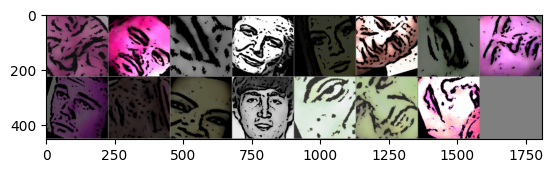

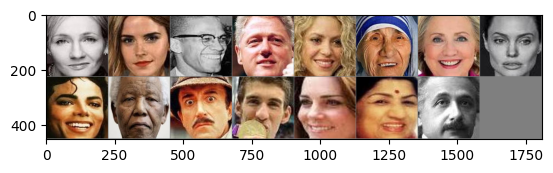

Train Dataset
MotherTeresa LeonardoDiCaprio AdolfHitler MargaretThatcher SelenaGomez DanielCraig LucianoPavarotti KimJongUn JustinBieber LanceArmstrong OprahWinfrey JohnLennon RowanAtkinson LataMangeshkar NicoleKidman
Test Dataset
JKRowling EmmaWatson MalcolmX BillClinton Shakira MotherTeresa HillaryClinton AngelinaJolie MichaelJackson NelsonMandela PeterSellers MichaelPhelps KateMiddleton LataMangeshkar AlbertEinstein


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
dataiter2 = iter(test_loader)

images, labels = next(dataiter)
imgs, lbs = next(dataiter2)

imshow(torchvision.utils.make_grid(images))
imshow(torchvision.utils.make_grid(imgs))

print("Train Dataset")
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(data_batchsize)))
print("Test Dataset")
print(' '.join(f'{classes[lbs[j]]:5s}' for j in range(data_batchsize)))

**The Neural Network VGG-16 Model(https://blog.paperspace.com/vgg-from-scratch-pytorch/)**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class VGG16(nn.Module):
    def __init__(self, num_classes=no_of_class):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

net = VGG16()
net = net.to(device)

**Optimizer**

In [ ]:
import torch.optim as optim
import json

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

480
120
67


**Training the Model**

In [ ]:
PATH = '/content/drive/MyDrive/Project/Cartoon_Model/cnn1.pth'

accuracies = {"val_accuracy":[]}
min_valid_loss = np.inf
early_stopping = 5

for epoch in range(epochs): #loop 20 times over the dataset

    running_loss = 0.0
    valid_running_loss = 0.0
    total_val = 0
    correct_val = 0
    valid_accuracy = 0

    for i, data in enumerate(train_loader, 0):
      inputs, labels = data[0].to(device), data[1].to(device)

      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      print(f"step:{i} training loss:{loss}")
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

      if i%20 == 19:
        print(f"[Epoch: {epoch+1}, Batch:{i+1}, Running Loss: {running_loss /20:.6f}]")
        running_loss = 0.0

    with torch.no_grad():
      for i, data in enumerate(val_loader,0):
        inputs, labels = data[0].to(device), data[1].to(device)
        target = net(inputs)
        loss = criterion(target,labels)
        print(f"step:{i} validation loss:{loss}")
        valid_running_loss+= loss.item()

        _, predicted = torch.max(target, 1)
        total_val += labels.size(0)
        correct_val += predicted.eq(labels).sum().item()

        if i%10==9:
          print(f"[Epoch: {epoch+1}, Batch:{i+1}, Validation Loss: {valid_running_loss /10:.6f}]")

    avg_valid_loss = valid_running_loss / len(val_loader)


    if min_valid_loss > avg_valid_loss:
      print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{avg_valid_loss:.6f}) Saving The Model')
      min_valid_loss = avg_valid_loss
      torch.save(net.state_dict(), PATH)
      early_stopping_count = 0
      print(f'Early stopping count is again initialized to {0}')
    else:
      early_stopping_count+= 1
      print(f"Early_stopping_count:{early_stopping_count}/{early_stopping}")

    valid_accuracy = (round(correct_val/total_val, 3))
    print(f"validation_accuracy: {valid_accuracy}")
    accuracies["val_accuracy"].append(valid_accuracy)

    if early_stopping_count>= early_stopping:
      print("Training Finished due to Overfitting")
      break

Streaming output truncated to the last 5000 lines.
step:103 training loss:1.7678000926971436
step:104 training loss:1.6406919956207275
step:105 training loss:1.4519423246383667
step:106 training loss:1.8858920335769653
step:107 training loss:1.7190327644348145
step:108 training loss:1.5862431526184082
step:109 training loss:1.021202802658081
step:110 training loss:2.2594797611236572
step:111 training loss:1.6055045127868652
step:112 training loss:1.5716735124588013
step:113 training loss:1.5570180416107178
step:114 training loss:1.5047615766525269
step:115 training loss:1.4124653339385986
step:116 training loss:1.1576101779937744
step:117 training loss:1.3216564655303955
step:118 training loss:1.2441141605377197
step:119 training loss:1.8168244361877441
[Epoch: 13, Batch:120, Running Loss: 1.599970]
step:120 training loss:1.355862021446228
step:121 training loss:1.3863774538040161
step:122 training loss:1.4128981828689575
step:123 training loss:1.8033581972122192
step:124 training loss

In [ ]:
PATH = '/content/drive/MyDrive/Project/Cartoon_Model/cnn1.pth'
net = VGG16()
net.load_state_dict(torch.load(PATH))
net = net.to(device)

**Calculate Accuracy**

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = (round(correct/total, 3))

print(f"Accuracy of the network on {len(test_loader)} Cartoon Images: {test_accuracy} %")

Accuracy of the network on 67 Cartoon Images: 0.251 %


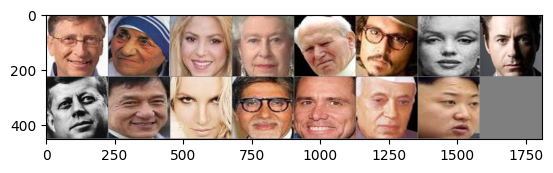

GroundTruth:  BillGates MotherTeresa Shakira QueenElizabethII PopeJohnPaulII JohnnyDepp
Predicted:  MuhammadAli MotherTeresa PrincessDiana GeorgeClooney CurtisJamesJacksonIII GeorgeClooney


In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(6)))
images = images.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(6)))


**Accuracy on each classs of cartoon**

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.title = "Cartoon Classwise Accuracy"

table.field_names = ["Class", "Accuracy(%)"]

correct = {classname: 0 for class_name in classes}
total = {classname: 0 for class_name in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_cnt in correct_pred.items():
  accuracy = 100 * float(correct_cnt) / total_pred[classname]
  table.add_row([classname, f'{accuracy:.1f}'])

print(table)

+-------------------------------------+
|      Cartoon Classwise Accuracy     |
+-----------------------+-------------+
|         Class         | Accuracy(%) |
+-----------------------+-------------+
|       AamirKhan       |     0.0     |
|     AbrahamLincoln    |     30.0    |
|      AdolfHitler      |     20.0    |
|      AishwaryaRai     |     40.0    |
|     AlbertEinstein    |     0.0     |
|     Amitabhbachan     |     20.0    |
|      AngelaMerkel     |     10.0    |
|     AngelinaJolie     |     10.0    |
|   ArnoldSchwazegger   |     20.0    |
|      BarackObama      |     30.0    |
|        Beyonce        |     30.0    |
|      BhagatSingh      |     20.0    |
|      BillClinton      |     10.0    |
|       BillGates       |     20.0    |
|        BradPitt       |     0.0     |
|     BritneySpears     |     30.0    |
|        BruceLee       |     10.0    |
|      BruceWillis      |     40.0    |
|     CharlieChaplin    |     50.0    |
|       CheGuevara      |     30.0    |


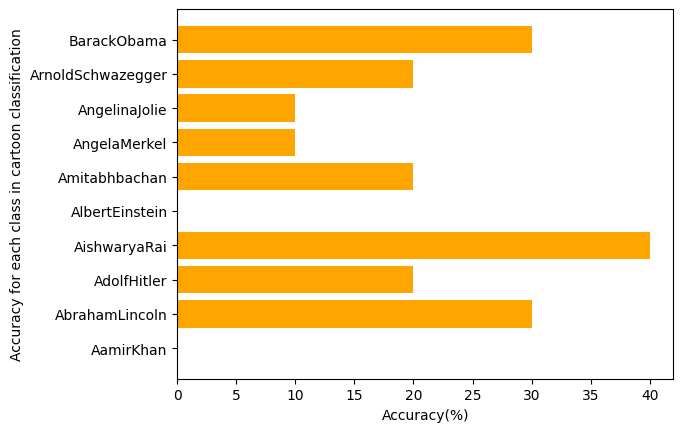

In [ ]:
import matplotlib.pyplot as plt

class_cnt = 0
for classname, correct_cnt in correct_pred.items():
  accuracy = 100 * float(correct_cnt) / total_pred[classname]
  if class_cnt < 10:
    plt.barh(classname,accuracy,color = "blue" if accuracy == 100 else "orange")
    class_cnt+=1
  else:
    break
plt.xlabel("Accuracy(%)")
plt.ylabel("Accuracy for each class in cartoon classification")
plt.show()

**Similar;y Classification of Sketches**

In [ ]:
from torch.utils.data.dataset import random_split

train_dataset = ImageFolder(root = sketch_classfolder, transform = data_transform)
val_size = 0.2
num_samples = len(train_dataset)

num_val = int(val_size * num_samples)
num_train = num_samples - num_val

train_dataset, val_dataset = random_split(train_dataset, [num_train, num_val])
test_dataset = ImageFolder(root = dataset_classfolder, transform = data_transform)

train_loader = DataLoader(train_dataset, batch_size = data_batchsize, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size = data_batchsize, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset,batch_size = data_batchsize, shuffle=True, num_workers=2)

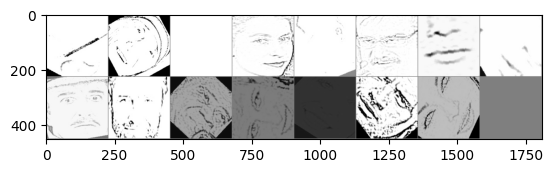

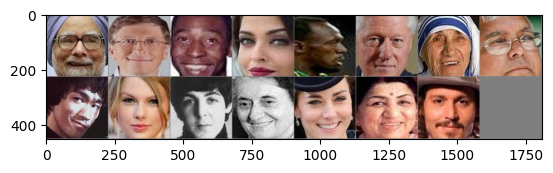

Train Dataset
MahatmaGandhi MotherTeresa LataMangeshkar QueenElizabethII PabloPicasso Rajinikanth SelenaGomez VladimirPutin PeterSellers HughJackman LouisArmstrong PrincessDiana BritneySpears DwayneJohnson AishwaryaRai
Test Dataset
ManmohanSingh BillGates Pele  AishwaryaRai UsainBolt BillClinton MotherTeresa LaluPrasadYadav BruceLee TaylorSwift PaulMcCartney IndiraGandhi KateMiddleton LataMangeshkar JohnnyDepp


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
dataiter2 = iter(test_loader)

images, labels = next(dataiter)
imgs, lbs = next(dataiter2)

imshow(torchvision.utils.make_grid(images))
imshow(torchvision.utils.make_grid(imgs))

print("Train Dataset")
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(data_batchsize)))
print("Test Dataset")
print(' '.join(f'{classes[lbs[j]]:5s}' for j in range(data_batchsize)))

In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

480
120
67
{'val_accuracy': []}


In [ ]:
Path = '/content/drive/MyDrive/Project/Sketch_Model/cnn.pth'
accuracies = {"val_accuracy":[]}
min_valid_loss = np.inf
early_stopping = 5

for epoch in range(epochs):  # loop over the dataset 20 times

    running_loss = 0.0
    valid_running_loss = 0.0
    total_val = 0
    correct_val = 0
    valid_accuracy = 0

    for i, data in enumerate(train_loader, 0):
      inputs, labels = data[0].to(device), data[1].to(device)

      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      print(f"step:{i} training loss:{loss}")
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

      if i%20 == 19:
        print(f"[Epoch: {epoch+1}, Batch:{i+1}, Running Loss: {running_loss /20:.6f}]")
        running_loss = 0.0

    with torch.no_grad():
      for i, data in enumerate(val_loader,0):
        inputs, labels = data[0].to(device), data[1].to(device)
        target = net(inputs)
        loss = criterion(target,labels)
        print(f"step:{i} validation loss:{loss}")
        valid_running_loss+= loss.item()

        _, predicted = torch.max(target, 1)
        total_val += labels.size(0)
        correct_val += predicted.eq(labels).sum().item()

        if i%10==9:
          print(f"[Epoch: {epoch+1}, Batch:{i+1}, Validation Loss: {valid_running_loss /10:.6f}]")

    avg_valid_loss = valid_running_loss / len(val_loader)


    if min_valid_loss > avg_valid_loss:
      print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{avg_valid_loss:.6f}) Saving The Model')
      min_valid_loss = avg_valid_loss
      torch.save(net.state_dict(), Path)
      early_stopping_count = 0
      print(f'Early stopping count is again initialized to {0}')
    else:
      early_stopping_count+= 1
      print(f"Early_stopping_count:{early_stopping_count}/{early_stopping}")

    valid_accuracy = (round(correct_val/total_val, 3))
    print(f"validation_accuracy: {valid_accuracy}")
    accuracies["val_accuracy"].append(valid_accuracy)

    if early_stopping_count>= early_stopping:
      print("Training Finished due to Overfitting")
      break

Streaming output truncated to the last 5000 lines.
step:102 training loss:2.123671531677246
step:103 training loss:2.7523889541625977
step:104 training loss:2.4151124954223633
step:105 training loss:2.0038986206054688
step:106 training loss:4.1021199226379395
step:107 training loss:3.7082953453063965
step:108 training loss:3.1422579288482666
step:109 training loss:2.6528866291046143
step:110 training loss:3.6982433795928955
step:111 training loss:2.429915189743042
step:112 training loss:2.283277750015259
step:113 training loss:1.913833737373352
step:114 training loss:2.539247989654541
step:115 training loss:2.668454647064209
step:116 training loss:2.1570310592651367
step:117 training loss:2.3165762424468994
step:118 training loss:2.7543013095855713
step:119 training loss:1.8304225206375122
[Epoch: 11, Batch:120, Running Loss: 2.658126]
step:120 training loss:2.1857097148895264
step:121 training loss:2.5062355995178223
step:122 training loss:2.337855577468872
step:123 training loss:2.20

In [ ]:
Path = '/content/drive/MyDrive/Project/Sketch_Model/cnn.pth'
net = VGG16()
net.load_state_dict(torch.load(Path))
net = net.to(device)

correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = (round(correct/total, 3))

print(f"Accuracy of the network on {len(test_loader)} Sketch Images: {test_accuracy} %")

Accuracy of the network on 67 Sketch Images: 0.351 %


In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)


# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(6)))
images = images.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(6)))

NameError: ignored

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.title = "Sketch Classwise Accuracy"

table.field_names = ["Class", "Accuracy(%)"]

correct= {class_name: 0 for classname in classes}
total= {class_name: 0 for classname in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_cnt in correct_pred.items():
  accuracy = 100 * float(correct_cnt) / total_pred[classname]
  table.add_row([classname, f'{accuracy:.1f}'])

print(table)

+-------------------------------------+
|      Sketch Classwise Accuracy      |
+-----------------------+-------------+
|         Class         | Accuracy(%) |
+-----------------------+-------------+
|       AamirKhan       |     40.0    |
|     AbrahamLincoln    |     30.0    |
|      AdolfHitler      |     10.0    |
|      AishwaryaRai     |     80.0    |
|     AlbertEinstein    |     70.0    |
|     Amitabhbachan     |     50.0    |
|      AngelaMerkel     |     40.0    |
|     AngelinaJolie     |     50.0    |
|   ArnoldSchwazegger   |     0.0     |
|      BarackObama      |     0.0     |
|        Beyonce        |     40.0    |
|      BhagatSingh      |     50.0    |
|      BillClinton      |     60.0    |
|       BillGates       |     80.0    |
|        BradPitt       |     0.0     |
|     BritneySpears     |     20.0    |
|        BruceLee       |     40.0    |
|      BruceWillis      |     80.0    |
|     CharlieChaplin    |     0.0     |
|       CheGuevara      |     10.0    |


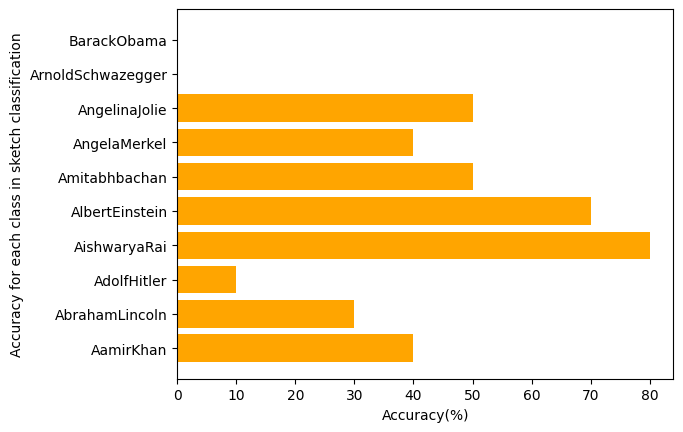

In [ ]:
import matplotlib.pyplot as plt

class_cnt = 0
for classname, correct_cnt in correct_pred.items():
  accuracy = 100 * float(correct_cnt) / total_pred[classname]
  if class_cnt < 10:
    plt.barh(classname,accuracy,color = "blue" if accuracy == 100 else "orange")
    class_cnt+=1
  else:
    break
plt.xlabel("Accuracy(%)")
plt.ylabel("Accuracy for each class in sketch classification")
plt.show()

**XGBoost Classifier**

In [ ]:
cartoon_classfolder = '/content/drive/MyDrive/Project/Cartoon_Class/'
sketch_classfolder = '/content/drive/MyDrive/Project/Sketch_Class/'
dataset_classfolder = '/content/drive/MyDrive/Project/Dataset_Classfolder/'

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torchvision import datasets, transforms
import numpy as np
from torch.utils.data.dataset import random_split

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset1 = ImageFolder(root = cartoon_folder, transform = data_transform)
dataset2 = ImageFolder(root = dataset_classfolder, transform = data_transform)

num_train = len(dataset1) - int(0.2 * len(dataset1))
num_test = len(dataset2)- int(0.8 * len(dataset2))

train_dataset = random_split(dataset1, [num_train,int(0.2 * len(dataset1))])
test_dataset = random_split(dataset2, [int(0.8 * len(dataset2)),num_test])

X_train = np.array([np.array(image) for image,_ in train_dataset[0]])
y_train = np.array([label for _,label in train_dataset[0]])

X_test = np.array([np.array(image) for image,_ in test_dataset[1]])
y_test = np.array([label for _,label in test_dataset[1]])

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

params = {'objective': 'multi:softmax'}

model = XGBClassifier(params, num_class = len(np.unique(y_train)), tree_method = 'gpu_hist')
model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(accuracy)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)
Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x787ee7a0c3a0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 588, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument
KeyboardInterrupt: 


XGBoostError: ignored

**RandomForest Classifier**

In [ ]:
cartoon_classfolder = '/content/drive/MyDrive/Project/Cartoon_Class/'
sketch_classfolder = '/content/drive/MyDrive/Project/Sketch_Class/'
dataset_classfolder = '/content/drive/MyDrive/Project/Dataset_Classfolder/'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torchvision import datasets, transforms
import numpy as np
from torch.utils.data.dataset import random_split

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset1 = ImageFolder(root = cartoon_folder, transform = data_transform)
dataset2 = ImageFolder(root = dataset_classfolder, transform = data_transform)

num_train = len(dataset1) - int(0.2 * len(dataset1))
num_test = len(dataset2)- int(0.8 * len(dataset2))


train_dataset = random_split(dataset1, [num_train, num_test])
test_dataset = random_split(dataset2, [num_train, num_test])

X_train = np.array([np.array(image) for image,_ in train_dataset[0]])
y_train = np.array([label for _,label in train_dataset[0]])

X_test = np.array([np.array(image) for image,_ in test_dataset[1]])
y_test = np.array([label for _,label in test_dataset[1]])

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

r_model = RandomForestClassifier(n_estimators=100, random_state=42)
r_model.fit(X_train, y_train)

pred = r_model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(accuracy)

KeyboardInterrupt: ignored

**Comparison of Different Models**

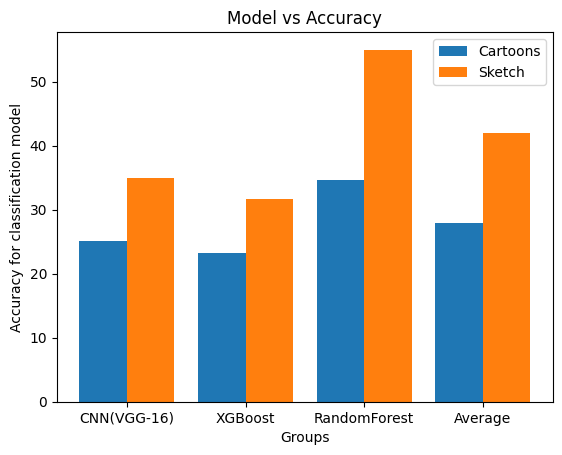

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
model = ["CNN(VGG-16)","XGBoost","RandomForest", "Average"]
#Calculated accuracies from the model

Cartoon_accuracy = [25.1,23.3,34.6,28]
Sketch_accuracy = [35,31.7,55,42]

X = np.arange(len(model))

plt.bar(X - 0.2, Cartoon_accuracy, 0.4, label = 'Cartoons')
plt.bar(X + 0.2, Sketch_accuracy, 0.4, label = 'Sketch')

plt.xticks(X, model)
plt.xlabel("Groups")
plt.ylabel("Accuracy for classification model")
plt.title("Model vs Accuracy")
plt.legend()
plt.show()